In [1]:
from matplotlib import pyplot as plt 
import numpy as np  
%matplotlib inline
from tqdm import tqdm
from scipy.special import erf

In [2]:
import sys
sys.path.append('../lib')
from simlib import *

In [3]:
def gen_int(x, m, s):
    return erf((x-m)/(np.sqrt(2)*s))/2

#def integral(x1, x2, m1, m2, s1, s2):
#    return 0.5 * (gen_int(x2, m1, s1) + gen_int(x2, m2, s2) - gen_int(x1, m1, s1) - gen_int(x1, m2, s2))

def integral(x1, x2, m, s):
    return gen_int(x2, m, s) - gen_int(x1, m, s)

In [4]:
method = 'lang'

In [72]:
#m1, m2 = [0, 0]
#s1, s2 = [1, 1]
m, s = [0, 2]
U = gaussian_potential([gaussian(m, s)])
#g1 = gaussian(m1, s1)
#g2 = gaussian(m2, s2)
#U = gaussian_potential([g1, g2])

In [73]:
num_particles = 100
max_t = 10000.0
dt = 0.1
x0 = 0.0
beta = 0.5
steps = max_t/dt

In [74]:
ts, xs = simulate(method=method, potential=U, num_particles=num_particles, max_t=max_t, dt=dt, x0=x0)

100%|██████████| 99999/99999 [04:46<00:00, 349.16it/s]


In [75]:
num_bins = 300
bins = np.linspace(-8, 8, num_bins)

In [76]:
hist = np.zeros(shape=(num_particles, num_bins-1))
for i in range(num_particles):
    hist[i], _ = np.histogram(xs[:,i], bins)

In [77]:
mean_hist = np.mean(hist, axis=0)

In [78]:
expected = steps * np.array([integral(bins[i], bins[i+1], m, s) for i in range(num_bins-1)])

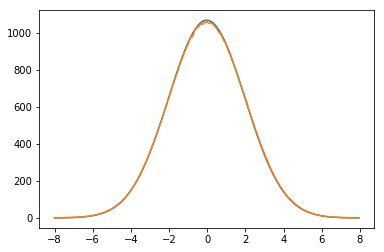

In [79]:
plt.plot(bins[:-1], expected)
plt.plot(bins[:-1], mean_hist)

In [80]:
err = np.sqrt(mean_hist)

In [81]:
match_array = [1 if h-er <= ex <= h+er else 0 for h, ex, er in zip(mean_hist, expected, err)]
match = np.sum(match_array) / num_bins
print('match = {}%'.format(match*100))

match = 99.66666666666667%
